In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import gdown 
from pandas.plotting import scatter_matrix


#### Reading solar farm data

In [22]:
# Download and read sierraleone farm dataset
gdown.download("https://drive.google.com/uc?id=1ba6tx51buPA4R7jJrkNMfmjGyZ3wOrw5", output="../data/sierraleone-dataset.csv", quiet=False)
sierraleone_df = pd.read_csv("../data/sierraleone-dataset.csv")


Downloading...
From: https://drive.google.com/uc?id=1ba6tx51buPA4R7jJrkNMfmjGyZ3wOrw5
To: /Users/yo/Documents/solar-farm-eda-and-statistical-analysis/data/sierraleone-dataset.csv
100%|██████████| 46.0M/46.0M [00:13<00:00, 3.40MB/s]


In [23]:
sierraleone_df.head(3)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


#### Summary Statistics

In [24]:
sierraleone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [42]:
# Calculating statistical measures and informations for Sierra Leone dataset
sierraleone_df.select_dtypes(include=["number"]).describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


#### Data Quality Check

**Checking for Missing Values**

As we can see below the only feature with missing values is `Comments`. 100% of the data ar null.
Decision: Since handling features with significant missing values lead the model to overfiting and miss learning we
can drop it.

In [43]:
# Missing values in Sierra Leone dataset
sierraleone_df.isnull().sum()[sierraleone_df.isnull().sum() > 0] / sierraleone_df.shape[0] * 100

Comments    100.0
dtype: float64

**Checking for outliers**

In [46]:
# Checking for outliers with IQR method
def detect_outlier_iqr(df: pd.DataFrame): 
    outlier_col = {}
    for col in df.select_dtypes('number'):
        q1 = df[col].abs().quantile(0.25)
        q3 = df[col].abs().quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Get the outliers
        outlier_col[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count() / df.shape[0] * 100
    return outlier_col

# Outliers in Sierra Leone dataset
outliers = detect_outlier_iqr(sierraleone_df)
print('Outlier percentage for each features:')
for col, percent in outliers.items():
    if percent > 0:
        print(f"{col}: {percent:.2f}%")


Outlier percentage for each features:
GHI: 3.26%
DNI: 19.37%
DHI: 1.00%
ModA: 4.00%
ModB: 3.92%
Tamb: 0.12%
RH: 2.26%
WS: 0.60%
WSgust: 0.70%
WSstdev: 0.15%
WDstdev: 0.94%
BP: 3.28%
Cleaning: 0.10%
Precipitation: 2.30%
TModA: 0.15%
TModB: 0.00%


**Checking Incorrect Entries**

In [28]:
# Checking all have numeric data types 
print('Non numeric datatype in Sierra Leon dataset: ', sierraleone_df.select_dtypes('object').columns)

Non numeric datatype in Sierra Leon dataset:  Index(['Timestamp'], dtype='object')


In [47]:
# Checking for incorrect entries values
def detect_out_of_range(df: pd.DataFrame):
    out_of_range = {}
    for col in df.select_dtypes('number'):
        count = df[(df[col] < 0)][col].count() 
        if count > 0:
            out_of_range[col] = df[(df[col] < 0)][col].count() / df.shape[0] * 100
    return out_of_range

# Out-of-range values in Sierra Leone dataset
off_ranges =  detect_out_of_range(sierraleone_df)
print('Out-of-range percentage for each features:')
for col, percent in off_ranges.items():
    print(f"{col}: {percent:.2f}%")

Out-of-range percentage for each features:
GHI: 49.68%
DNI: 50.68%
DHI: 50.06%


In [30]:

# Identify duplicate
# Identify duplicate rows in Sierra Leone dataset
print('Duplicat columns in sierraleone dataset: ', sierraleone_df.duplicated().sum())

Duplicat columns in sierraleone dataset:  0


#### Time Series Analysis

Monthly Patterns of GHI, DNI, DHI, and Tamb python Copy code

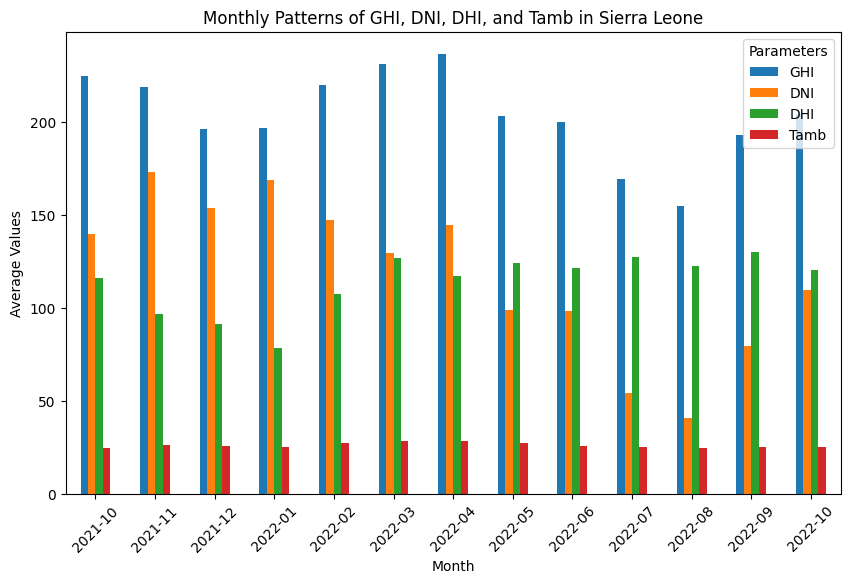

In [31]:
def monthly_trend(df, title):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Group by Month (using Timestamp)
    monthly_data = df.groupby(df['Timestamp'].dt.to_period('M'))[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

    # Plot
    monthly_data.plot(kind='bar', figsize=(10, 6), title=title)
    plt.ylabel('Average Values')
    plt.xlabel('Month')
    plt.xticks(rotation=45)  # Rotate x-axis for better visibility
    plt.legend(title='Parameters')
    plt.show()

# Monthly trend for Sierra Leone dataset
monthly_trend(sierraleone_df, 'Monthly Patterns of GHI, DNI, DHI, and Tamb in Sierra Leone')

Daily Trends of Solar Irradiance and Temperature

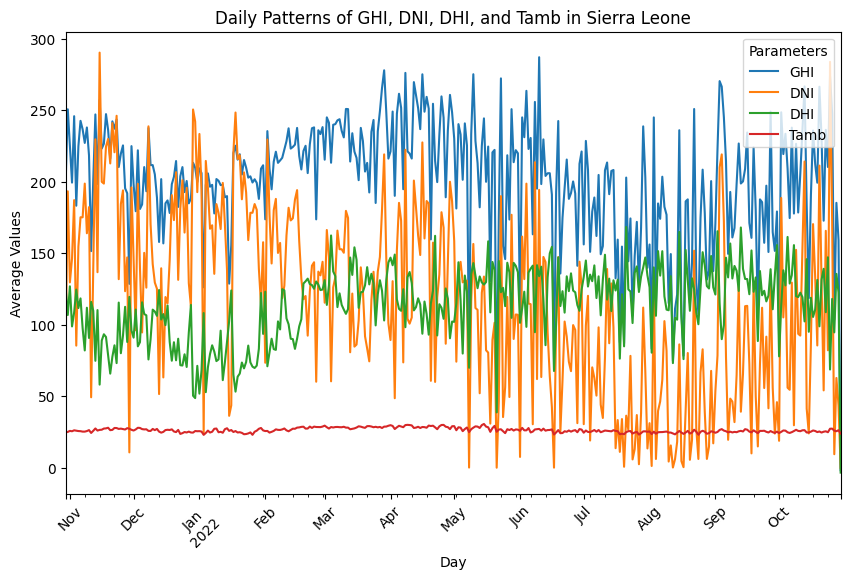

In [32]:
def daily_trend(df, title):
    # Group by Day (using Timestamp)
    daily_data = df.groupby(df['Timestamp'].dt.to_period('D'))[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

    # Plot
    daily_data.plot(kind='line', figsize=(10, 6), title=title)
    plt.ylabel('Average Values')
    plt.xlabel('Day')
    plt.xticks(rotation=45)  # Rotate x-axis for better visibility
    plt.legend(title='Parameters')
    plt.show()

# Daily trend for Sierra Leone dataset
daily_trend(sierraleone_df, 'Daily Patterns of GHI, DNI, DHI, and Tamb in Sierra Leone')

Impact of Cleaning on Sensor Readings Over Time

/Users/yo/Documents/solar-farm-eda-and-statistical-analysis/sfeda-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


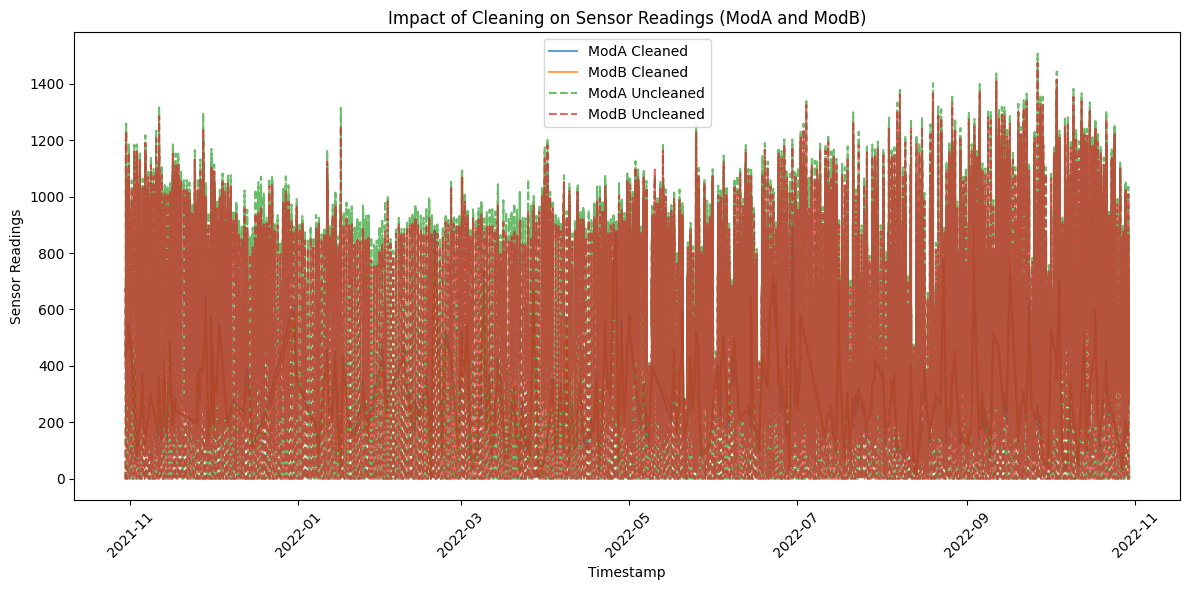

In [33]:
def cleaning_impact_over_time(df):
    # Filter data by Cleaning status
    cleaned_data = df[df['Cleaning'] == 1]
    uncleaned_data = df[df['Cleaning'] == 0]

    # Plot Cleaned vs. Uncleaned ModA and ModB
    plt.figure(figsize=(12, 6))

    # Cleaned Data
    plt.plot(cleaned_data['Timestamp'], cleaned_data['ModA'], label='ModA Cleaned', alpha=0.7)
    plt.plot(cleaned_data['Timestamp'], cleaned_data['ModB'], label='ModB Cleaned', alpha=0.7)

    # Uncleaned Data
    plt.plot(uncleaned_data['Timestamp'], uncleaned_data['ModA'], label='ModA Uncleaned', alpha=0.7, linestyle='--')
    plt.plot(uncleaned_data['Timestamp'], uncleaned_data['ModB'], label='ModB Uncleaned', alpha=0.7, linestyle='--')

    plt.legend()
    plt.title('Impact of Cleaning on Sensor Readings (ModA and ModB)')
    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Readings')
    plt.xticks(rotation=45)  # Rotate timestamps for better visibility
    plt.tight_layout()
    plt.show()

# Cleaning impact over time for Sierra Leone dataset
cleaning_impact_over_time(sierraleone_df)


#### Correlation Analysis

In [34]:
rad_components = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
temp_measures = ['TModA', 'TModB']
wind_conditions = ['WS', 'WD', 'WSgust']


**Correlation analysis between irradiation components and temprature measures**

In [35]:
# Correlation analysis for Sierra Leone dataset
# sns.pairplot(sierraleone_df[rad_components + temp_measures])
# plt.show()
sierraleone_df[rad_components + temp_measures].corr()

,GHI,DNI,DHI,TModA,TModB,TModA,TModB
GHI,1.000000,0.869108,0.865815,0.923092,0.912260,0.923092,0.912260
DNI,0.869108,1.000000,0.536710,0.816449,0.808194,0.816449,0.808194
DHI,0.865815,0.536710,1.000000,0.808479,0.807551,0.808479,0.807551
TModA,0.923092,0.816449,0.808479,1.000000,0.993228,1.000000,0.993228
TModB,0.912260,0.808194,0.807551,0.993228,1.000000,0.993228,1.000000
TModA,0.923092,0.816449,0.808479,1.000000,0.993228,1.000000,0.993228
TModB,0.912260,0.808194,0.807551,0.993228,1.000000,0.993228,1.000000


**Scatter matrix analysis between solar irradiance and wind conditions**

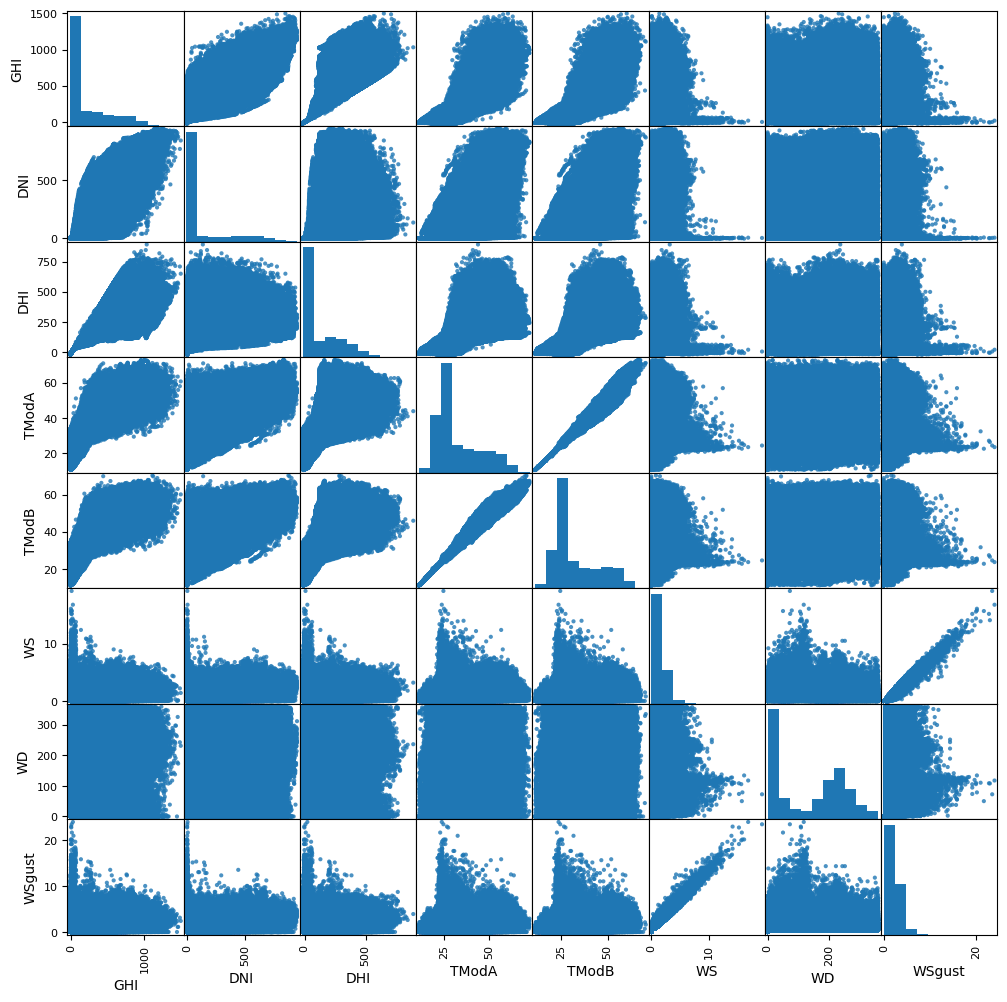

In [36]:
# Correlation analysis for Sierra Leone dataset
scatter_matrix(sierraleone_df[rad_components + wind_conditions], alpha=0.8, figsize=(12, 12), diagonal='hist')
plt.show()

#### Wind Analysis

/var/folders/jn/0b_xwd412532nmd6152zbw1w0000gp/T/ipykernel_2014/2756824735.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_summary = sierraleone_df.groupby(direction_bins)['WS'].mean()


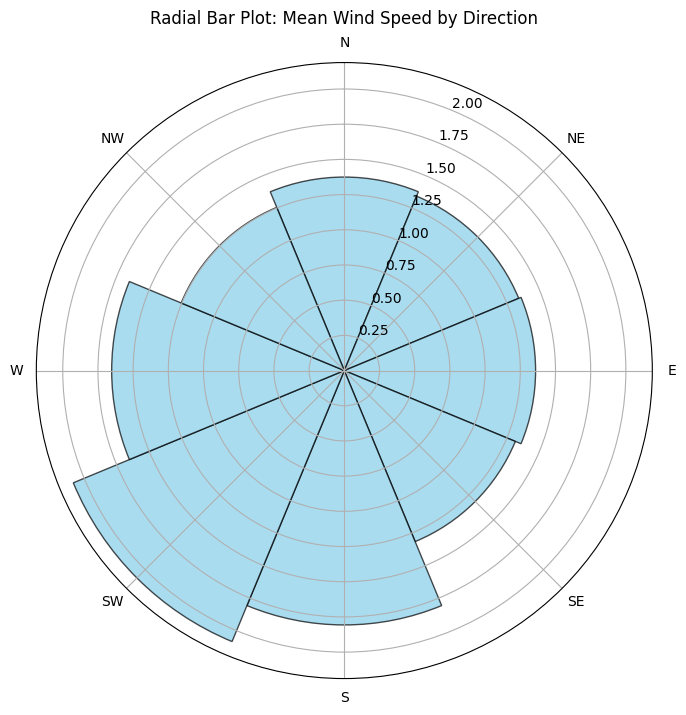

In [37]:
# Aggregate wind sierraleone_df by direction bins
direction_bins = pd.cut(sierraleone_df['WD'], bins=np.arange(0, 361, 45), labels=np.arange(0, 360, 45))
wind_summary = sierraleone_df.groupby(direction_bins)['WS'].mean()

# Radial bar plot sierraleone_df
angles = np.deg2rad(np.arange(0, 360, 45))  # Convert to radians
values = wind_summary.values

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
bars = ax.bar(angles, values, width=np.pi/4, color="skyblue", edgecolor="black", alpha=0.7)

# Customizing plot
ax.set_theta_zero_location('N')  # North at the top
ax.set_theta_direction(-1)  # Clockwise direction
ax.set_xticks(angles)
ax.set_xticklabels(["N", "NE", "E", "SE", "S", "SW", "W", "NW"])
plt.title("Radial Bar Plot: Mean Wind Speed by Direction", va='bottom')
plt.show()

#### Temperature Analysis

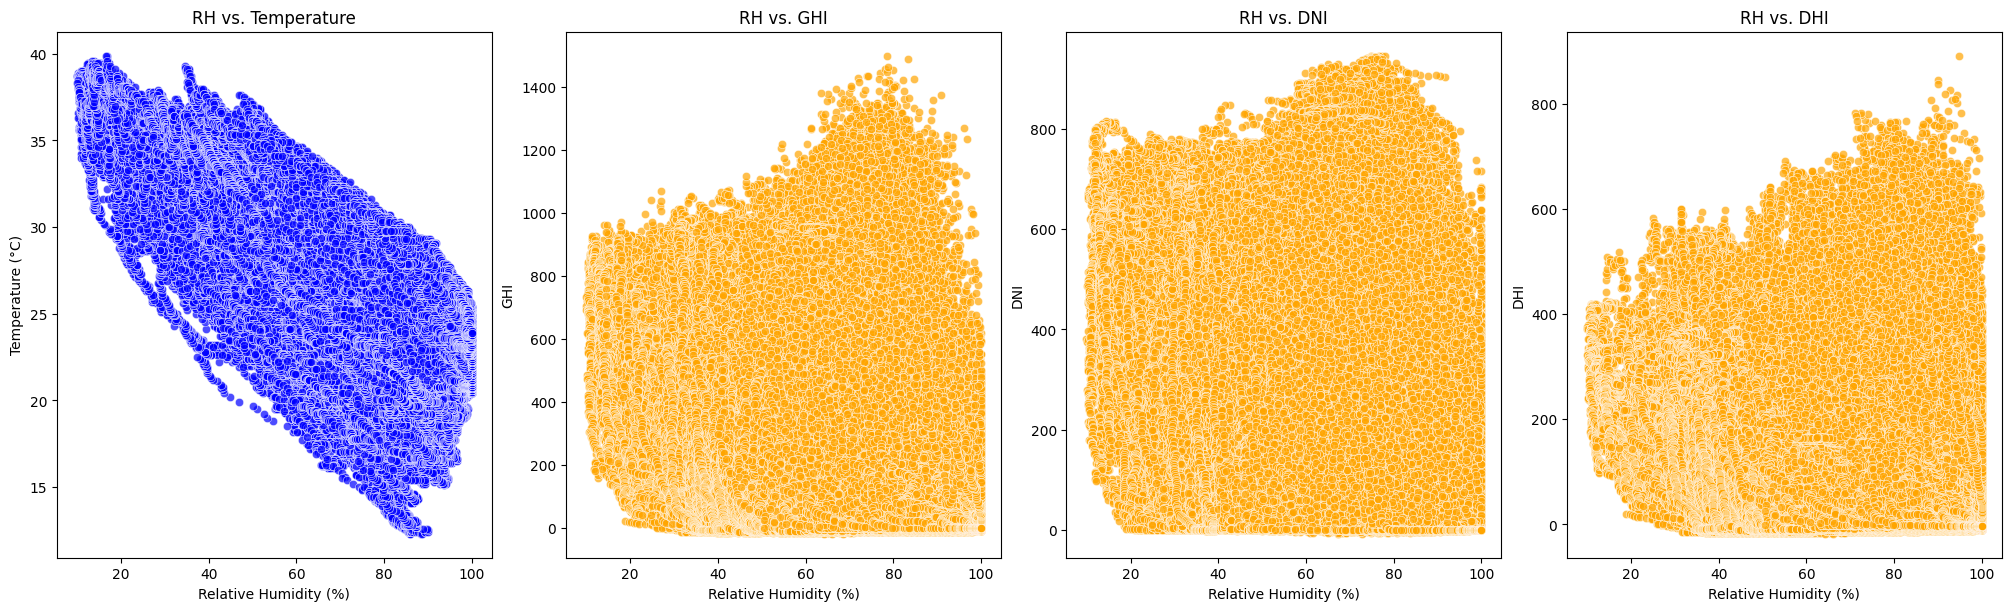

In [38]:
def plot_scatter(df):
    # Define variables
    solar_vars = ['GHI', 'DNI', 'DHI']  # Solar radiation variables
    temperature_var = 'Tamb'
    humidity_var = 'RH'

    # Set up the horizontal layout for subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(solar_vars) + 1, figsize=(5 * (len(solar_vars) + 1), 6), constrained_layout=True)

    # Plot RH vs. Temperature
    sns.scatterplot(x=df[humidity_var], y=df[temperature_var], ax=axes[0], color='blue', alpha=0.7)
    axes[0].set_title('RH vs. Temperature')
    axes[0].set_xlabel('Relative Humidity (%)')
    axes[0].set_ylabel('Temperature (°C)')

    # Plot RH vs. each Solar Radiation variable
    for i, solar_var in enumerate(solar_vars):
        sns.scatterplot(x=df[humidity_var], y=df[solar_var], ax=axes[i + 1], color='orange', alpha=0.7)
        axes[i + 1].set_title(f'RH vs. {solar_var}')
        axes[i + 1].set_xlabel('Relative Humidity (%)')
        axes[i + 1].set_ylabel(solar_var)

    plt.show()

# Scatter plot for Sierra Leone dataset
plot_scatter(sierraleone_df)

#### Frequency Distribution of irradation and temprature

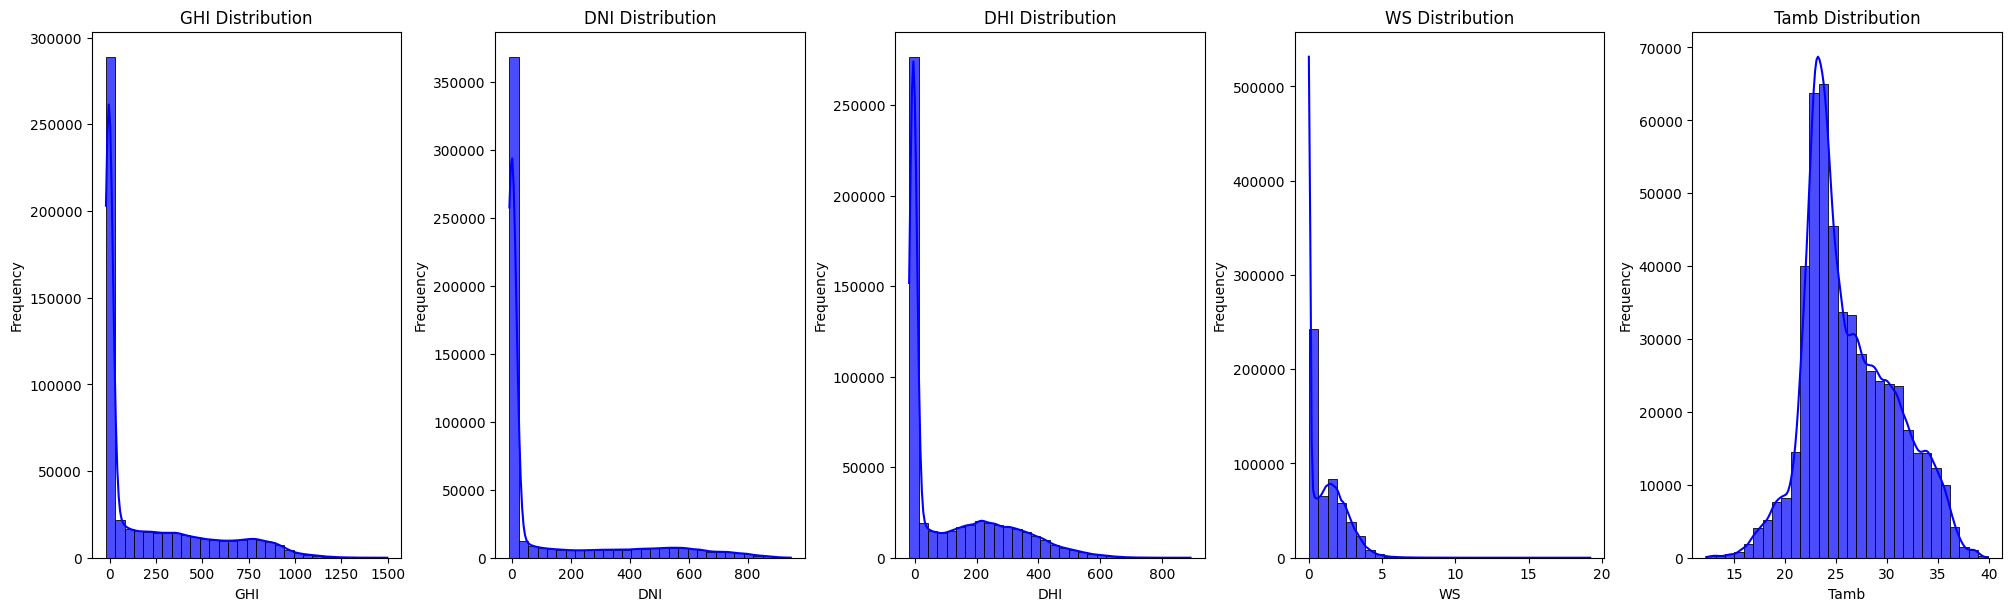

In [39]:
def frequency_distribution(df):

    # Define the variables to plot histograms for
    variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']  # Update with your column names

    # Set up the horizontal layout for subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(4 * len(variables), 6), constrained_layout=True)

    # Loop through the variables and plot histograms
    for ax, var in zip(axes, variables):
        sns.histplot(df[var], bins=30, kde=True, ax=ax, color='blue', alpha=0.7)
        ax.set_title(f'{var} Distribution', fontsize=12)
        ax.set_xlabel(var, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)

    plt.show()
    
# Frequency distribution for Sierra Leone dataset
frequency_distribution(sierraleone_df)

#### Z-Score Analysis

In [40]:
def z_score(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=np.number)

    # Calculate Z-scores for all numeric columns
    z_scores = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()
    anomalies = (z_scores.abs() > 3)

    return anomalies.sum()[anomalies.sum() > 0]

# Z-scores for Sierra Leone dataset
print('Z-scores for Sierra Leone dataset: ', z_score(sierraleone_df))

Z-scores for Sierra Leone dataset:  GHI              2477
DNI              7586
DHI              2986
ModA             1604
ModB             2041
Tamb              192
RH               4929
WS               3967
WSgust           3665
WSstdev          2410
WDstdev          5140
BP                977
Cleaning          508
Precipitation    4067
TModA             100
TModB               4
dtype: int64


#### Explor complete relationship with Bubble charts

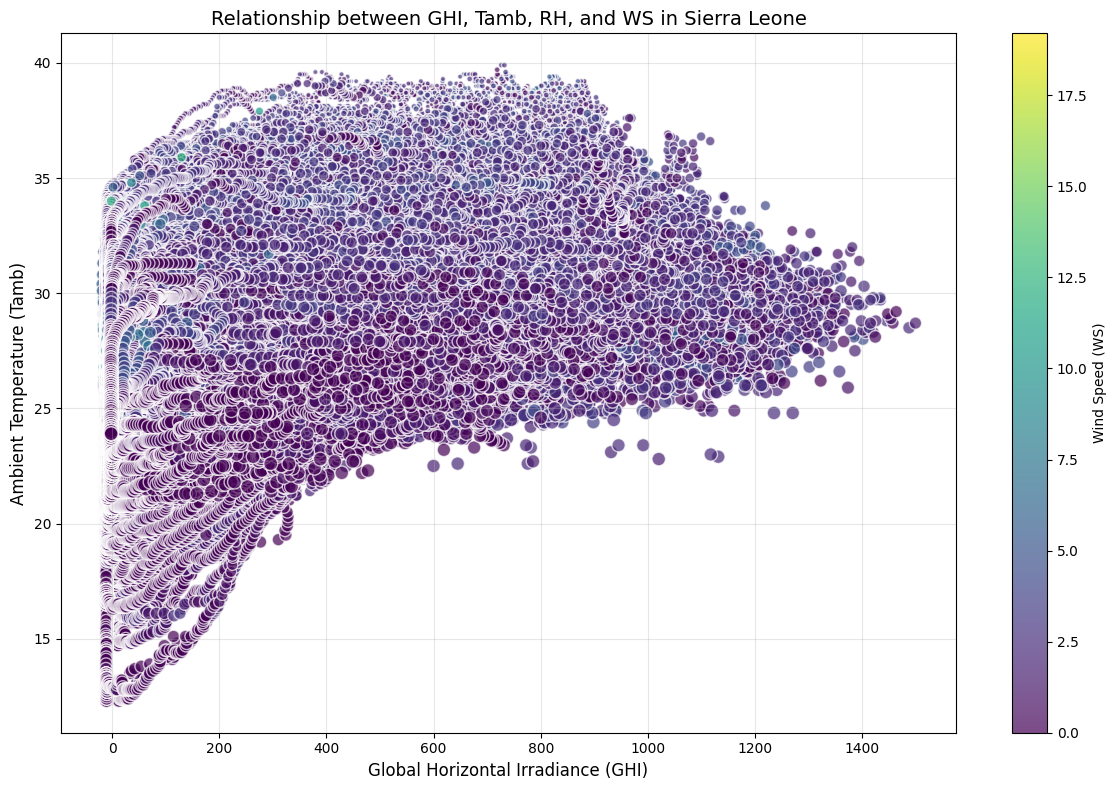

In [41]:
def explor_relationship(df, title):

    # Example variables in your dataset
    x = df['GHI']       
    y = df['Tamb']      
    bubble_size = df['RH']  
    color = df['WS']     

    # Scale bubble sizes for better visibility
    scaled_bubble_size = bubble_size / bubble_size.max() * 100

    # Create the bubble chart
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x, y, s=scaled_bubble_size, c=color, cmap='viridis', alpha=0.7, edgecolors='w')

    # Add a color bar to show the wind speed
    cbar = plt.colorbar(scatter)
    cbar.set_label('Wind Speed (WS)')

    # Set chart title and axis labels
    plt.title(title, fontsize=14)
    plt.xlabel('Global Horizontal Irradiance (GHI)', fontsize=12)
    plt.ylabel('Ambient Temperature (Tamb)', fontsize=12)

    # Show the plot
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Relationship between GHI, Tamb, RH, and WS in Sierra Leone dataset
explor_relationship(sierraleone_df, 'Relationship between GHI, Tamb, RH, and WS in Sierra Leone')

#### Data Cleaning

**Handling Missing Values**

In [44]:
# Droping Comment Feature
sierraleone_df.drop(columns='Comments', axis=1, inplace=True)